# Proyecto de Regresión Logística (predecir el clic en un anuncio)

En este *notebook* usaremos la Regresión Logística para indicar si un usuario de Internet en particular hizo clic o no en un anuncio. Intentaremos crear un modelo que prediga si harán clic o no en un anuncio en función de las características de ese usuario.

Este conjunto de datos contiene las siguientes características:

* '`Daily Time Spent on Site`': tiempo del consumidor en el sitio en minutos.
* '`Age`': edad del cliente en años.
* '`Area Income`': promedio de renta del área geográfica del consumidor.
* '`Daily Internet Usage`': promedio en minutos al día del consumidor en Internet.
* '`Ad Topic Line`': titular del anuncio.
* '`City`': ciudad del consumidor.
* '`Male`': si el consumidor es hombre o mujer.
* '`Country`': país del consumidor.
* '`Timestamp`': hora en la que el consumidor hizo clic en el anuncio o cerró la ventana.
* '`Clicked on Ad`': 0 o 1 indican si el consumidor hizo clic en el anuncio.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

## Carga de datos

In [2]:
df = pd.read_csv('data/advertising.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


# 1. Análisis exploratorio de datos (*EDA*)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [4]:
df.describe(include='all')

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000,1000,1000,1000.00000
unique,NaN,NaN,NaN,NaN,1000,969,NaN,237,1000,NaN
top,NaN,NaN,NaN,NaN,Cloned 5thgeneration orchestration,Lisamouth,NaN,France,2016-03-27 00:53:11,NaN
freq,NaN,NaN,NaN,NaN,1,3,NaN,9,1,NaN
mean,65.000200,36.009000,55000.000080,180.000100,NaN,NaN,0.481000,NaN,NaN,0.50000
std,15.853615,8.785562,13414.634022,43.902339,NaN,NaN,0.499889,NaN,NaN,0.50025
min,32.600000,19.000000,13996.500000,104.780000,NaN,NaN,0.000000,NaN,NaN,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,NaN,NaN,0.000000,NaN,NaN,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,NaN,NaN,0.000000,NaN,NaN,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,NaN,NaN,1.000000,NaN,NaN,1.00000


In [5]:
df['Clicked on Ad'].value_counts(normalize=True)

Clicked on Ad
0    0.5
1    0.5
Name: proportion, dtype: float64

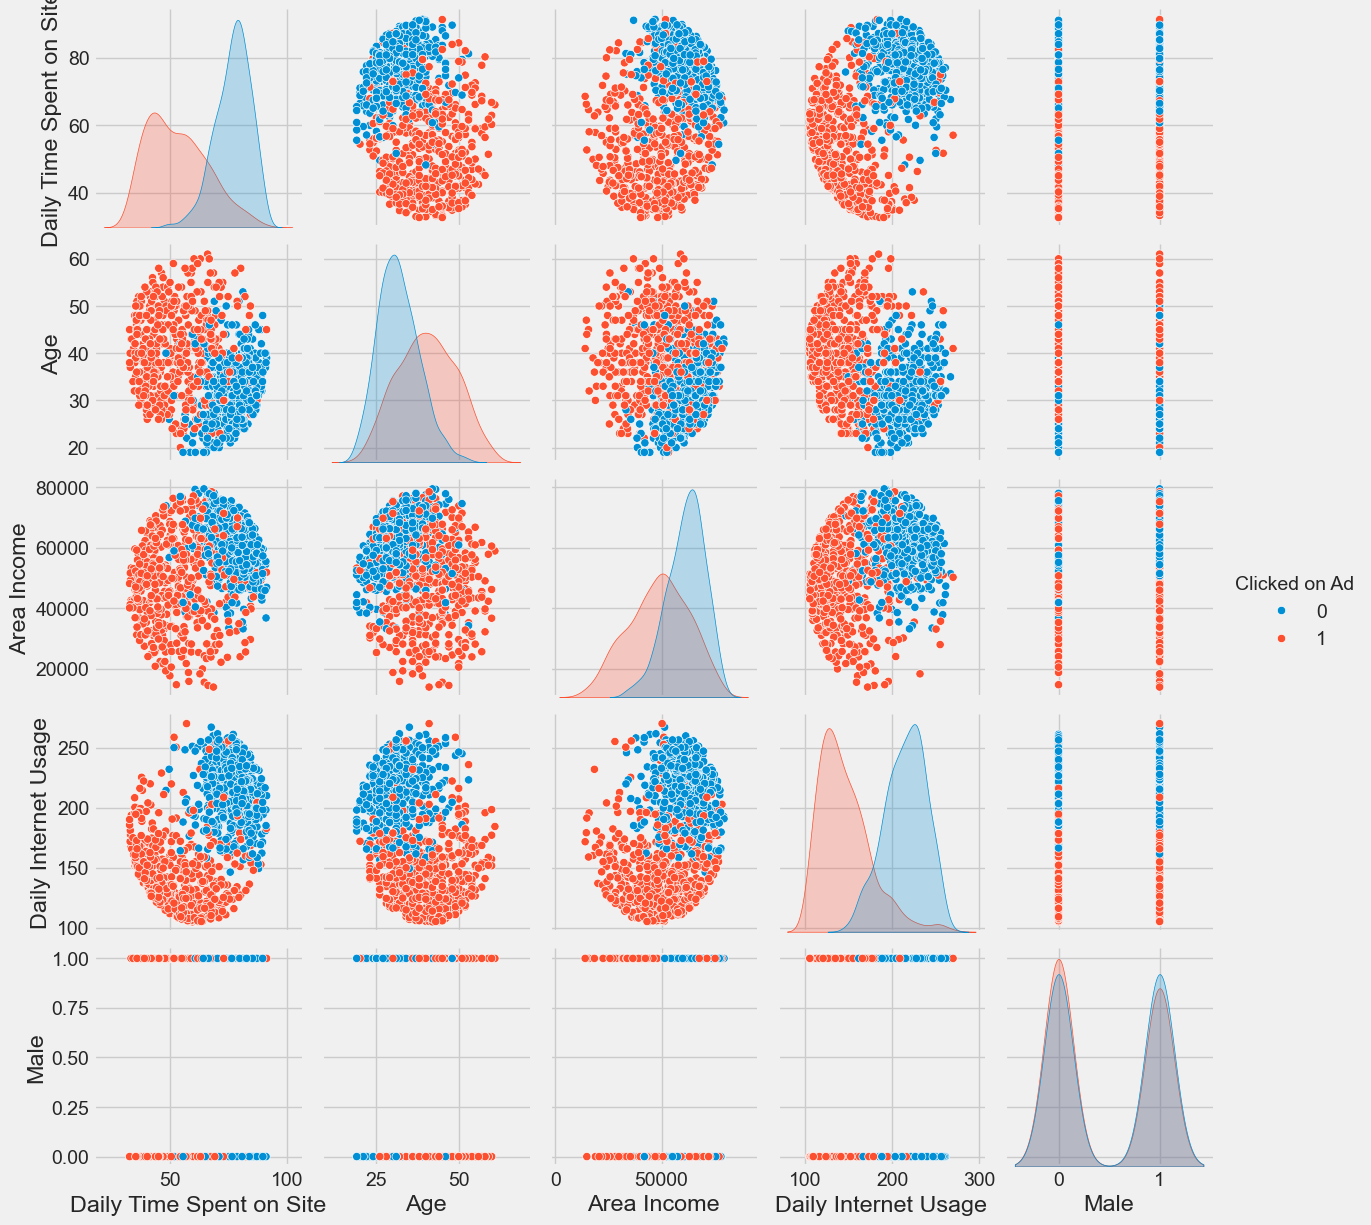

In [6]:
sns.pairplot(df, hue="Clicked on Ad")

<Axes: >

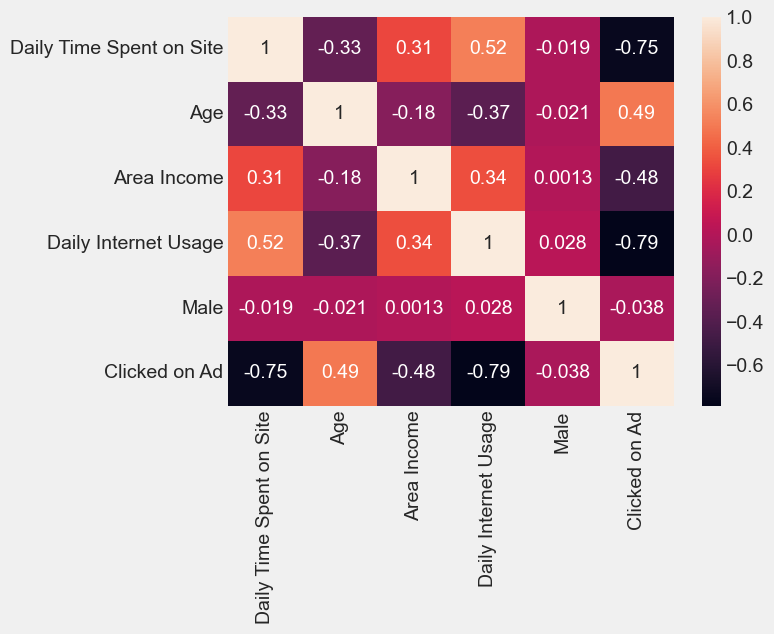

In [7]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

# 2. Preparación de datos para la Regresión Logística

#### 1. *Feature engineering*

In [8]:
df[df['Clicked on Ad']==1].head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1
10,47.64,49,45632.51,122.02,Centralized neutral neural-net,West Brandonton,0,Qatar,2016-03-16 20:19:01,1
12,69.57,48,51636.92,113.12,Centralized content-based focus group,West Katiefurt,1,Egypt,2016-06-03 01:14:41,1
14,42.95,33,30976.00,143.56,Grass-roots coherent extranet,West William,0,Barbados,2016-03-24 09:31:49,1
15,63.45,23,52182.23,140.64,Persistent demand-driven interface,New Travistown,1,Spain,2016-03-09 03:41:30,1


In [9]:
df['Age30'] = np.where(df['Age']<30 , 1, 0)
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Age30
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,1
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,1
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,0


<Axes: >

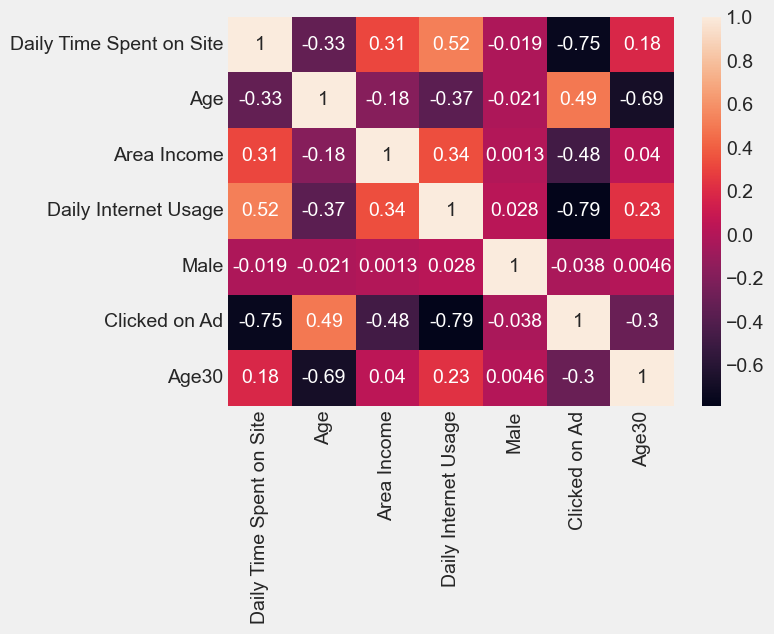

In [10]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [11]:
print(df['Ad Topic Line'].nunique())
print(df['Country'].nunique())
print(df['City'].nunique())

1000
237
969


In [12]:
df['palabra_challenge'] = np.where(df['Ad Topic Line'].str.contains('challenge'), 1, 0)
df[df['palabra_challenge']==1]

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Age30,palabra_challenge
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1,0,1
113,46.13,46,37838.72,123.64,Horizontal hybrid challenge,New Rachel,1,Guyana,2016-01-09 05:44:56,1,0,1
312,75.55,22,41851.38,169.40,Upgradable even-keeled challenge,New Amanda,0,Taiwan,2016-02-19 07:29:30,1,1,1
317,73.38,25,53058.91,236.19,Horizontal transitional challenge,South Corey,1,French Southern Territories,2016-04-21 09:30:35,0,1,1
480,57.11,22,59677.64,207.17,Self-enabling tertiary challenge,Lake Jonathanview,1,Dominican Republic,2016-06-07 23:46:51,0,1,1
669,62.18,33,65899.68,126.44,Reactive impactful challenge,West Leahton,0,Hungary,2016-05-20 00:00:48,1,0,1
735,83.91,29,53223.58,222.87,Distributed bifurcated challenge,Haleberg,0,Burundi,2016-01-04 22:27:25,0,1,1
957,69.95,28,56725.47,247.01,Horizontal even-keeled challenge,New Julie,0,Malta,2016-04-28 01:24:34,0,1,1
985,72.88,44,64011.26,125.12,Customer-focused explicit challenge,Sarahland,0,Yemen,2016-04-21 19:56:24,1,0,1


In [13]:
df['palabra_challenge'].value_counts()

palabra_challenge
0    991
1      9
Name: count, dtype: int64

In [14]:
df['Ad Topic Line'].str.split(' ')

0         [Cloned, 5thgeneration, orchestration]
1         [Monitored, national, standardization]
2           [Organic, bottom-line, service-desk]
3      [Triple-buffered, reciprocal, time-frame]
4              [Robust, logistical, utilization]
                         ...                    
995            [Fundamental, modular, algorithm]
996          [Grass-roots, cohesive, monitoring]
997             [Expanded, intangible, solution]
998     [Proactive, bandwidth-monitored, policy]
999          [Virtual, 5thgeneration, emulation]
Name: Ad Topic Line, Length: 1000, dtype: object

In [15]:
df['City']

0         Wrightburgh
1           West Jodi
2            Davidton
3      West Terrifurt
4        South Manuel
            ...      
995         Duffystad
996       New Darlene
997     South Jessica
998       West Steven
999       Ronniemouth
Name: City, Length: 1000, dtype: object

In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(df['City'])

df['City_encoded'] = le.transform(df['City'])

df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Age30,palabra_challenge,City_encoded
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,0,0,961
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,0,0,903
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,1,0,111
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,1,0,939
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,0,0,805
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1,0,0,126
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1,0,0,488
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1,0,0,798
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0,1,0,935


In [17]:
pd.get_dummies(df['Country'])

,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antarctica (the territory South of 60 deg S),Antigua and Barbuda,Argentina,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wallis and Futuna,Western Sahara,Yemen,Zambia,Zimbabwe
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['month'] = df['Timestamp'].dt.month
df['hour'] = df['Timestamp'].dt.hour
df['weekday'] = df['Timestamp'].dt.weekday
df['day'] = df['Timestamp'].dt.day
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Age30,palabra_challenge,City_encoded,month,hour,weekday,day
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,0,0,961,3,0,6,27
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,0,0,903,4,1,0,4
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,1,0,111,3,20,6,13
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,1,0,939,1,2,6,10
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,0,0,805,6,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1,0,0,126,2,21,3,11
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1,0,0,488,4,2,4,22
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1,0,0,798,2,17,0,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0,1,0,935,3,2,3,24


<Axes: >

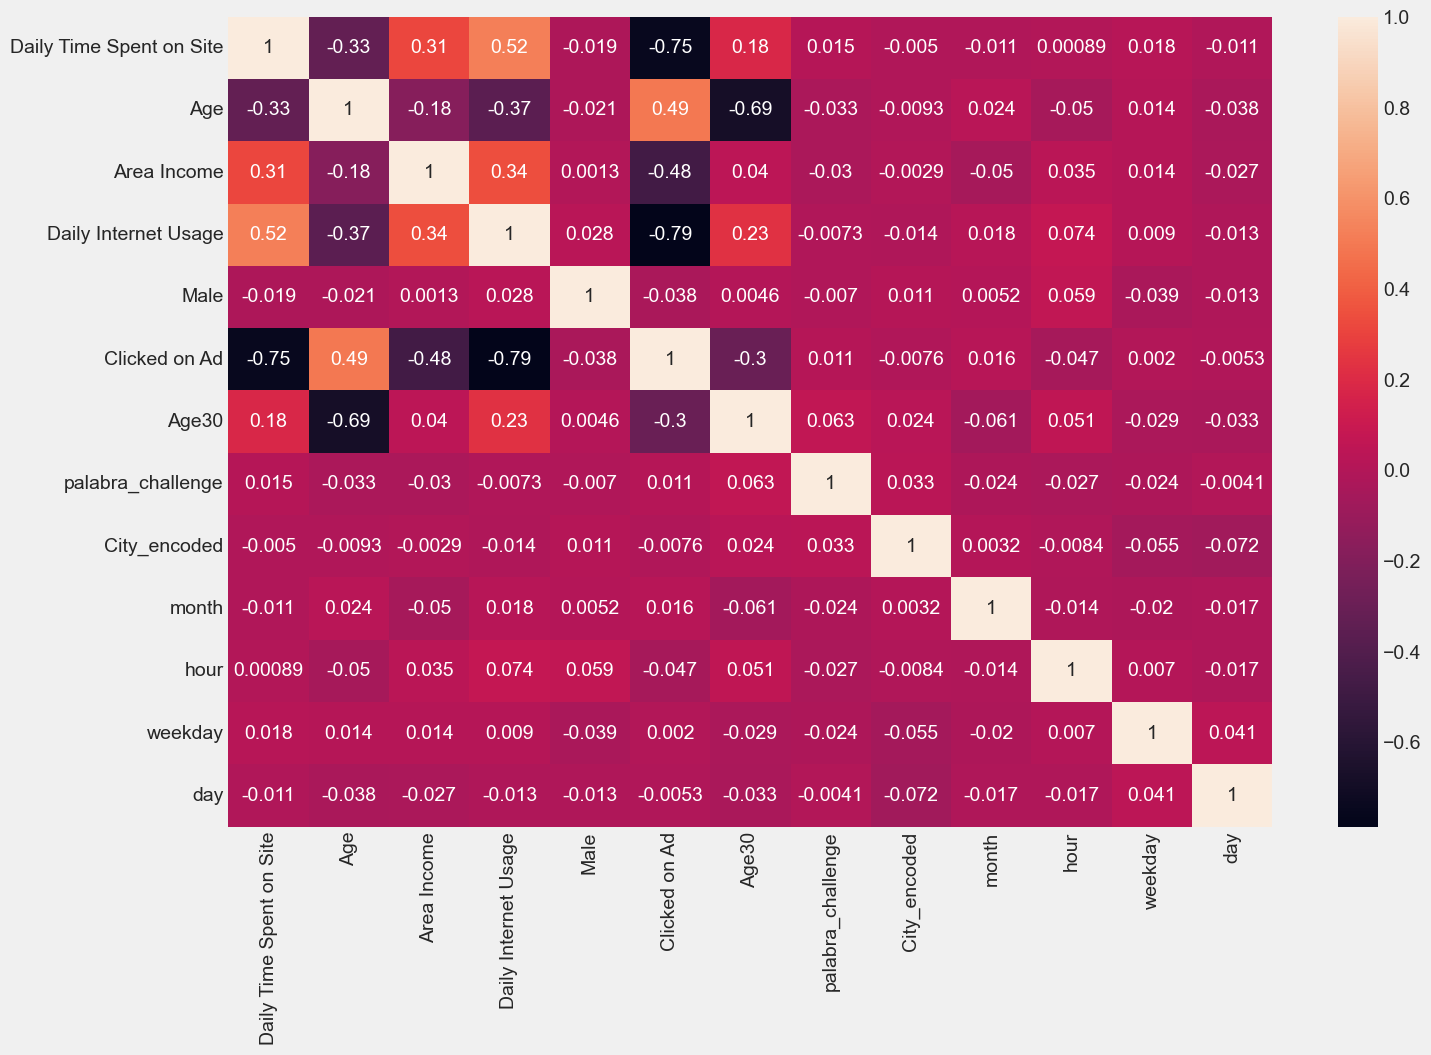

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True), annot=True)

#### 2. *Train test split*

In [20]:
X = df[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']]
y = df['Clicked on Ad']

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 4)
(200, 4)
(800,)
(200,)


#### 3. *StandardScaler()*

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.transform(X_test)

In [24]:
scaler.inverse_transform(X_train_scal)

array([[4.913000e+01, 3.200000e+01, 4.109717e+04, 1.204900e+02],
       [7.829000e+01, 3.800000e+01, 5.784496e+04, 2.520700e+02],
       [3.500000e+01, 4.000000e+01, 4.603373e+04, 1.512500e+02],
       ...,
       [4.017000e+01, 2.600000e+01, 4.739195e+04, 1.713100e+02],
       [7.837000e+01, 2.400000e+01, 5.501508e+04, 2.072700e+02],
       [3.956000e+01, 4.100000e+01, 5.924346e+04, 1.431300e+02]])

# 3. Implementa un algoritmo de Regresión Logística en Scikit-Learn y ejecuta las predicciones. Use validación cruzada.

In [25]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train_scal, y_train)

LogisticRegression()

In [26]:
log_reg.score(X_train_scal, y_train)

0.96875

In [27]:
from sklearn.model_selection import cross_val_score

log_reg_cv = LogisticRegression()

cv_results = cross_val_score(log_reg_cv, X_train_scal, y_train, cv=5, scoring="accuracy")

In [28]:
cv_results

array([0.94375, 0.975  , 0.95625, 0.975  , 0.975  ])

In [29]:
cv_results.mean()

0.9650000000000001

In [30]:
cv_results.std()

0.012869537676233741

# 4. Evaluación

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [32]:
y_pred = log_reg.predict(X_test_scal)

In [33]:
c_mat = confusion_matrix(y_test, y_pred)#, normalize = 'true')
print(c_mat)
c_mat = confusion_matrix(y_test, y_pred, normalize = 'true')
print(c_mat)

[[99  1]
 [ 3 97]]
[[0.99 0.01]
 [0.03 0.97]]


In [34]:
accuracy_score(y_test, y_pred)

0.98

#### 1. Matriz de Confusión

In [37]:
c_mat = confusion_matrix(y_test, y_pred)#, normalize = 'true')
c_mat

array([[99,  1],
       [ 3, 97]], dtype=int64)

In [38]:
(99 + 97) / (200)

0.98

<Axes: >

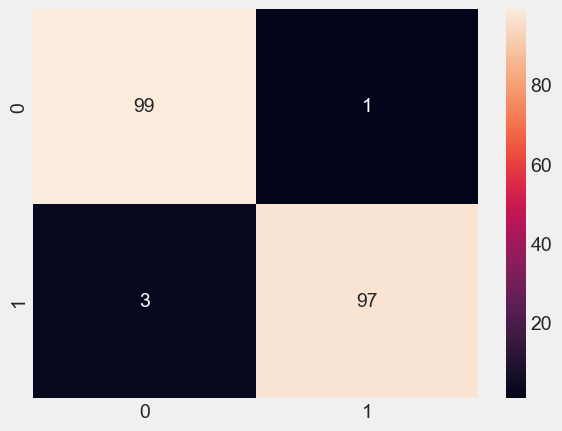

In [39]:
sns.heatmap(c_mat, annot=True)

#### 2. Precisión

In [40]:
c_mat = confusion_matrix(y_test, y_pred)
c_mat

array([[99,  1],
       [ 3, 97]], dtype=int64)

TP/(TP+FP)

In [41]:
97/(97 + 1)

0.9897959183673469

In [47]:
c_mat[1][1] / (c_mat[1][1] + c_mat[0][1])

0.9897959183673469

In [42]:
p = precision_score(y_test,y_pred)
p

0.9897959183673469

#### 3. Sensibilidad (*recall*)

TP/(TP+FN)

In [43]:
97/(97+3)

0.97

In [46]:
c_mat[1][1] / (c_mat[1][1] + c_mat[1][0])

0.97

In [44]:
r = recall_score(y_test,y_pred)
r

0.97



#### 4. F1 Score


2 * precision * recall / (precision + recall)

In [48]:
2 * p * r / (p + r)

0.9797979797979798

In [49]:
f1_score(y_test, y_pred)

0.9797979797979798

#### 5. Curva ROC

In [50]:
roc_auc_score(y_test, y_pred)

0.98

In [51]:
y_pred_proba = log_reg.predict_proba(X_test_scal)
y_pred_proba

array([[7.08267773e-05, 9.99929173e-01],
       [9.91704818e-01, 8.29518223e-03],
       [9.74816019e-01, 2.51839806e-02],
       [9.85357344e-01, 1.46426561e-02],
       [4.81289417e-05, 9.99951871e-01],
       [9.14653809e-06, 9.99990853e-01],
       [3.68641304e-04, 9.99631359e-01],
       [2.24811031e-04, 9.99775189e-01],
       [9.65952337e-01, 3.40476628e-02],
       [9.88972877e-01, 1.10271232e-02],
       [7.56435268e-04, 9.99243565e-01],
       [1.62076467e-04, 9.99837924e-01],
       [1.41723581e-05, 9.99985828e-01],
       [9.92493779e-01, 7.50622119e-03],
       [9.88131458e-01, 1.18685422e-02],
       [9.90161769e-01, 9.83823076e-03],
       [1.91010686e-05, 9.99980899e-01],
       [9.73591171e-01, 2.64088287e-02],
       [8.79885943e-05, 9.99912011e-01],
       [9.91894677e-01, 8.10532296e-03],
       [1.27483899e-05, 9.99987252e-01],
       [9.72125253e-01, 2.78747467e-02],
       [3.30862768e-02, 9.66913723e-01],
       [9.89714491e-01, 1.02855089e-02],
       [5.164733

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])


In [ ]:
plt.plot(fpr,tpr)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

#### 6. Curva P-R

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba[:,1])

In [ ]:
thresholds

In [ ]:
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")